<a href="https://colab.research.google.com/github/menmon/MACHINE-LEARNING/blob/main/Template_Tubes_ML_ITA2373.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tugas Besar Machine Learning**
## **<"dataset trayek transportasi umum">**
### **Nama Kelompok [Bayu Krisna Mukti-1202180012]**
### **Nama Kelompok [Alifia khairunnisa 1202190021]**
### **Nama Kelompok [M. Qoidul Ghuril M. 1202190025]**
### **Nama Kelompok [Gilang Maulana-1202190011]**

##1. Identifikasi masalah dan Pernyataan masalah yang ingin diselesaikan

In [ ]:
Menganalisa faktor dari penyebab kelebihan muatan pada angkutan umum di Surabaya

## 2. Eksplorasi data (EDA) (25 poin)

In [ ]:
!pip install git+https://github.com/nickkunz/smogn.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nickkunz/smogn.git to /tmp/pip-req-build-rbc_xigi
  Running command git clone -q https://github.com/nickkunz/smogn.git /tmp/pip-req-build-rbc_xigi
  Created wheel for smogn: filename=smogn-0.1.1-py3-none-any.whl size=31260 sha256=a12808f625df0053bdbec34fede03d45de483a216db46ee22d4b9199cf3171af
  Stored in directory: /tmp/pip-ephem-wheel-cache-59pwdlr5/wheels/31/bb/2b/423f632f38f777fa7f7bd73085e546acf69c233b08a4466a1c
Successfully built smogn


In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.7 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=661d8bf2a75fd8fbfecc8bdfac0e9b669cf32939367aec14e43ddb13dc88e795
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=02e66e6fc1d8d711cd966c96850d73bee1fe7fd32870366bc3157dd5f0d2b3a0
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
import smogn
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Tubes ML/dataset trayek transportasi umum3.csv")
# print(type(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Kode trayek                                50 non-null     int64
 1   Rata-rata waktu perjalanan trayek (menit)  50 non-null     int64
 2   Jumlah angkutan beroperasi                 50 non-null     int64
 3   Jumlah angkutan lulus uji KIR              50 non-null     int64
 4   Jumlah angkutan berizin                    50 non-null     int64
 5   Frekuensi                                  50 non-null     int64
 6   Headway (menit)                            50 non-null     int64
 7   Waktu tunggu (menit)                       50 non-null     int64
 8   Kapasitas penumpang                        50 non-null     int64
 9   Realisasi jumlah penumpang                 50 non-null     int64
 10  Load factor                                50 non-nu

In [ ]:
target_column = 'Load factor'
feature_columns = ['Rata-rata waktu perjalanan trayek (menit)','Jumlah angkutan beroperasi','Headway (menit)', 'Waktu tunggu (menit)']

In [ ]:
target=df[target_column]
fitur=df[feature_columns]
target
fitur

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Headway (menit),Waktu tunggu (menit)
0,72,5,28.194762,14.097381
1,85,14,20.341429,10.170714
2,51,5,28.947619,14.473810
3,58,51,24.139524,12.069762
4,101,70,24.731429,12.365714
5,75,102,25.000000,12.500000
6,129,23,21.170952,10.585476
7,123,15,15.379524,7.689762
8,103,26,22.116190,11.058095
9,61,91,25.778571,12.889286


In [ ]:
#cek missing value 
df.isnull()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#cek duplikasi data
df.duplicated

<bound method DataFrame.duplicated of     Rata-rata waktu perjalanan trayek (menit)  Jumlah angkutan beroperasi  \
0                                          72                           5   
1                                          85                          14   
2                                          51                           5   
3                                          58                          51   
4                                         101                          70   
5                                          75                         102   
6                                         129                          23   
7                                         123                          15   
8                                         103                          26   
9                                          61                          91   
10                                         73                          99   
11                                    

In [ ]:
import seaborn

In [ ]:
#check distribusi data
waktu=df['Rata-rata waktu perjalanan trayek (menit)'].astype('int')

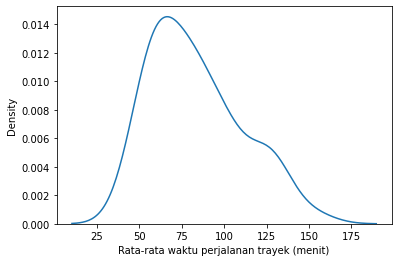

In [ ]:
seaborn.kdeplot(waktu)

## 3.Persiapan Data (termasuk split data) (25 poin)

In [ ]:
#memisahkan kolom fitur dan label
df = pd.DataFrame(df)
df.head()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,72,5,0,0,0,2,28.194762,14.097381,12,3.6108,30.09
1,85,14,0,0,0,2,20.341429,10.170714,12,3.0636,25.53
2,51,5,4,4,4,1,28.947619,14.473810,12,2.9700,24.75
3,58,51,13,13,13,2,24.139524,12.069762,12,3.3036,27.53
4,101,70,26,26,26,2,24.731429,12.365714,12,2.7732,23.11


In [ ]:
x = df.iloc[:, :-1]
x.head()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang
0,72,5,0,0,0,2,28.194762,14.097381,12,3.6108
1,85,14,0,0,0,2,20.341429,10.170714,12,3.0636
2,51,5,4,4,4,1,28.947619,14.473810,12,2.9700
3,58,51,13,13,13,2,24.139524,12.069762,12,3.3036
4,101,70,26,26,26,2,24.731429,12.365714,12,2.7732


In [ ]:
y = df.iloc[:, -1]
y.head()

0    30.09
1    25.53
2    24.75
3    27.53
4    23.11
Name: Load factor, dtype: float64

In [ ]:
import seaborn
import matplotlib.patches as  mpatches

seaborn.kdeplot(df['Rata-rata waktu perjalanan trayek (menit)'])



NameError: ignored

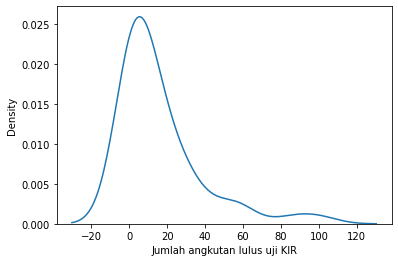

In [ ]:
seaborn.kdeplot(df['Jumlah angkutan lulus uji KIR'])

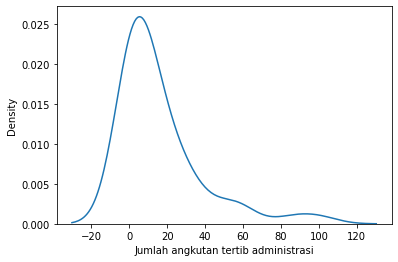

In [ ]:
seaborn.kdeplot(df['Jumlah angkutan tertib administrasi'])

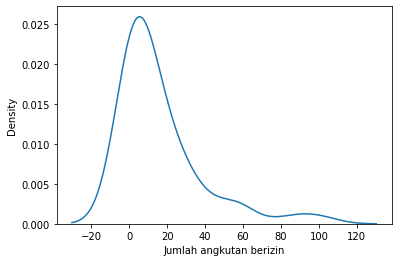

In [ ]:
seaborn.kdeplot(df['Jumlah angkutan berizin'])

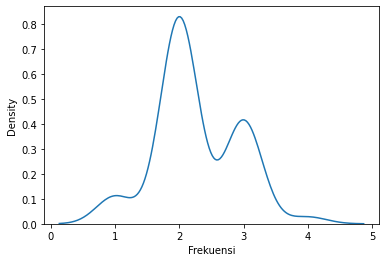

In [ ]:
seaborn.kdeplot(df['Frekuensi'])

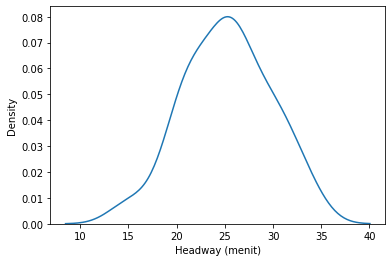

In [ ]:
seaborn.kdeplot(df['Headway (menit)'])

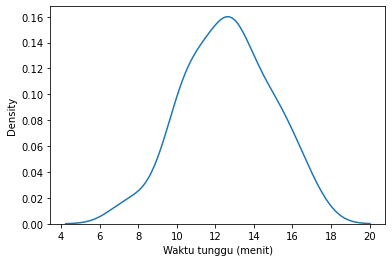

In [ ]:
seaborn.kdeplot(df['Waktu tunggu (menit)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


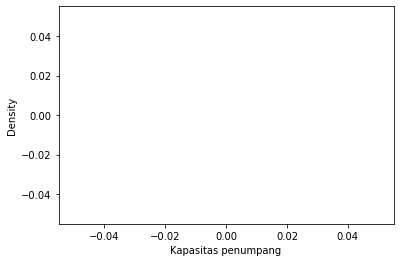

In [ ]:
seaborn.kdeplot(df['Kapasitas penumpang'])

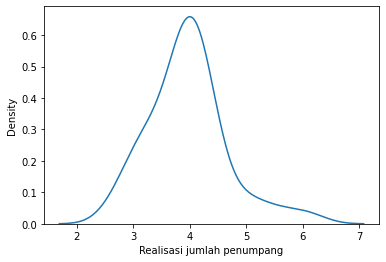

In [ ]:
seaborn.kdeplot(df['Realisasi jumlah penumpang'])

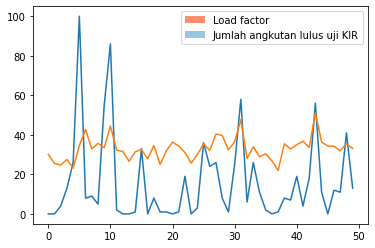

In [ ]:


plt.plot(df['Jumlah angkutan lulus uji KIR'])
plt.plot(df['Load factor'])

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Load factor"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Jumlah angkutan lulus uji KIR")]
plt.legend(handles=handles)
plt.show()

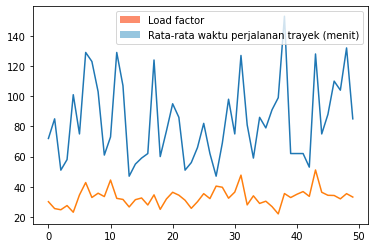

In [ ]:

plt.plot(df['Rata-rata waktu perjalanan trayek (menit)'])
plt.plot(df['Load factor'])

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Load factor"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Rata-rata waktu perjalanan trayek (menit)")]
plt.legend(handles=handles)
plt.show()

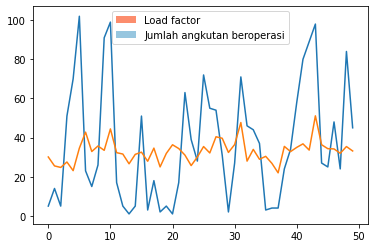

In [ ]:
plt.plot(df['Jumlah angkutan beroperasi'])
plt.plot(df['Load factor'])

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Load factor"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Jumlah angkutan beroperasi")]
plt.legend(handles=handles)
plt.show()

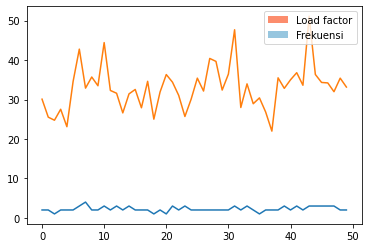

In [ ]:
plt.plot(df['Frekuensi'])
plt.plot(df['Load factor'])

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Load factor"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Frekuensi")]
plt.legend(handles=handles)
plt.show()

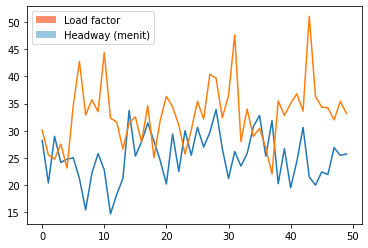

In [ ]:
plt.plot(df['Headway (menit)'])
plt.plot(df['Load factor'])

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Load factor"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Headway (menit)")]
plt.legend(handles=handles)
plt.show()

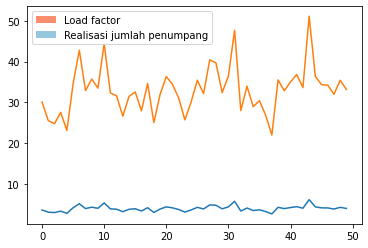

In [ ]:
plt.plot(df['Realisasi jumlah penumpang'])
plt.plot(df['Load factor'])

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Load factor"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Realisasi jumlah penumpang")]
plt.legend(handles=handles)
plt.show()


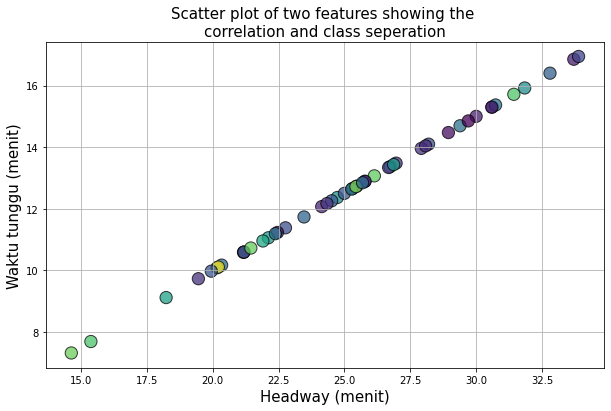

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Headway (menit)'],df['Waktu tunggu (menit)'],c=df['Rata-rata waktu perjalanan trayek (menit)'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("Headway (menit)",fontsize=15)
plt.ylabel("Waktu tunggu (menit)",fontsize=15)
plt.show()

In [ ]:
korelasi=['Jumlah angkutan lulus uji KIR', 'Rata-rata waktu perjalanan trayek (menit)','Jumlah angkutan beroperasi','Frekuensi','Headway (menit)','Realisasi jumlah penumpang','Load factor']
dfkor=df[korelasi]
dfkor.corr()

,Jumlah angkutan lulus uji KIR,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Frekuensi,Headway (menit),Realisasi jumlah penumpang,Load factor
Jumlah angkutan lulus uji KIR,1.000000,0.038109,0.812529,0.123200,-0.044987,0.520543,0.520543
Rata-rata waktu perjalanan trayek (menit),0.038109,1.000000,-0.050082,0.237519,-0.375830,0.334092,0.334092
Jumlah angkutan beroperasi,0.812529,-0.050082,1.000000,0.189894,-0.020765,0.472438,0.472438
Frekuensi,0.123200,0.237519,0.189894,1.000000,-0.261086,0.388997,0.388997
Headway (menit),-0.044987,-0.375830,-0.020765,-0.261086,1.000000,-0.179745,-0.179745
Realisasi jumlah penumpang,0.520543,0.334092,0.472438,0.388997,-0.179745,1.000000,1.000000
Load factor,0.520543,0.334092,0.472438,0.388997,-0.179745,1.000000,1.000000


In [ ]:
#Teknik PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df.drop('Rata-rata waktu perjalanan trayek (menit)',axis=1)
y = df['Rata-rata waktu perjalanan trayek (menit)']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [ ]:
df.head()

,Kode trayek,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,1,72,5,0,0,2,28,14,12,3,30
1,2,85,14,0,0,2,20,10,12,3,25
2,3,51,5,4,4,1,28,14,12,2,24
3,4,58,51,13,13,2,24,12,12,3,27
4,5,101,70,26,26,2,24,12,12,2,23


In [ ]:
dfx.head()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,-1.697749,-1.057478,-0.731812,-0.731812,-0.415058,0.759273,0.873621,0.0,-0.640184,-0.434339
1,-1.628453,-0.758568,-0.731812,-0.731812,-0.415058,-1.081389,-0.965581,0.0,-0.640184,-1.303018
2,-1.559158,-1.057478,-0.548630,-0.548630,-2.011435,0.759273,0.873621,0.0,-1.920553,-1.476754
3,-1.489862,0.470285,-0.136471,-0.136471,-0.415058,-0.161058,-0.045980,0.0,-0.640184,-0.955547
4,-1.420566,1.101318,0.458871,0.458871,-0.415058,-0.161058,-0.045980,0.0,-1.920553,-1.650490


In [ ]:
dfx.describe()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.0,5.000000e+01,5.000000e+01
mean,0.000000,-9.325873e-17,-5.329071e-17,-5.329071e-17,3.619327e-16,1.393330e-16,1.462719e-16,0.0,-2.664535e-17,-9.714451e-18
std,1.010153,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,0.0,1.010153e+00,1.010153e+00
min,-1.697749,-1.190327e+00,-7.318123e-01,-7.318123e-01,-2.011435e+00,-2.461885e+00,-2.344982e+00,0.0,-1.920553e+00,-1.997962e+00
25%,-0.848875,-9.827504e-01,-6.860168e-01,-6.860168e-01,-4.150581e-01,-7.937854e-01,-8.506309e-01,0.0,-6.401844e-01,-4.343395e-01
50%,0.000000,-3.102024e-01,-3.654482e-01,-3.654482e-01,-4.150581e-01,6.902482e-02,-4.598005e-02,0.0,-6.401844e-01,-8.686789e-02
75%,0.848875,5.948314e-01,3.100356e-01,3.100356e-01,1.181319e+00,7.592730e-01,8.736209e-01,0.0,6.401844e-01,4.343395e-01
max,1.697749,2.164110e+00,3.847739e+00,3.847739e+00,2.777696e+00,1.909687e+00,1.793222e+00,0.0,3.200922e+00,3.214112e+00


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
dfx_pca = pca.fit(dfx)

In [ ]:
pd.DataFrame(dfx_pca.explained_variance_ratio_*100)

,0
0,4.274565e+01
1,2.340607e+01
2,1.510295e+01
3,7.998383e+00
4,7.574280e+00
5,2.197487e+00
6,9.135946e-01
7,6.157691e-02
8,9.068386e-32
9,1.086022e-34


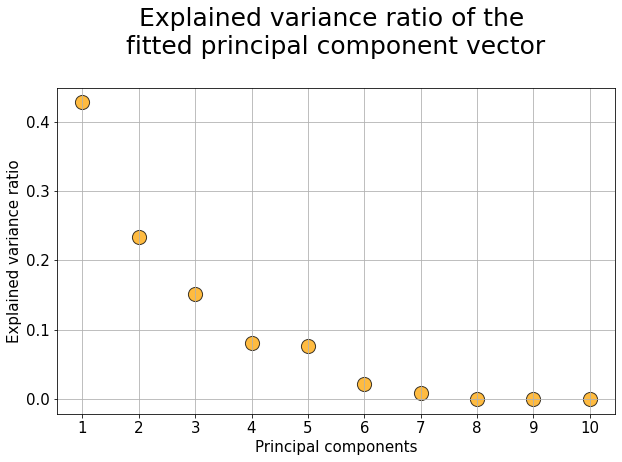

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [ ]:
dfx_trans = pca.transform(dfx)

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.991283,-0.581431,0.727092,1.473622,0.372202,0.117216,0.155506,0.047230,-1.845195e-16,-2.093222e-17
1,-1.711652,1.649610,1.615673,0.319105,0.121935,0.357274,-0.410175,0.078444,1.135328e-16,2.604892e-17
2,-3.120338,-1.179006,1.965991,0.034299,0.538485,-0.139037,0.322216,0.012287,1.049708e-16,-2.006499e-17
3,-0.774677,0.009415,1.610792,0.259490,-0.290994,0.803573,-0.079627,0.048917,-7.383135e-17,1.204514e-17
4,-0.811082,-0.435822,2.575937,-0.547128,-1.413814,0.618810,0.316433,0.021898,7.336729e-17,2.307940e-17


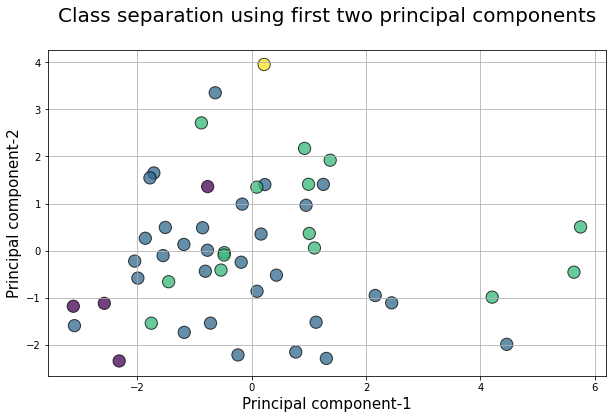

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Frekuensi'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

KeyError: ignored

<Figure size 432x288 with 0 Axes>

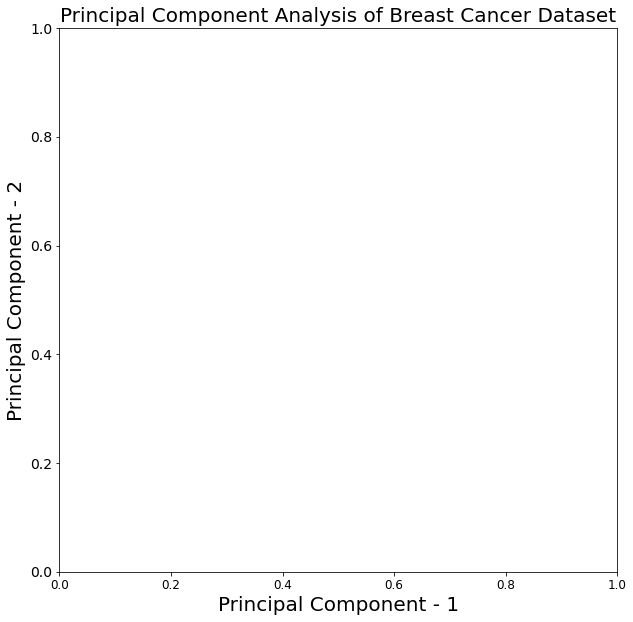

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Frekuensi', 'Headway (menit)']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = dfx['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [ ]:
#Teknik MSL
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, y, test_size=0.2, random_state=0)

In [ ]:
#Menerapkan 2 komponen utama sebagai prediktor
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Klasifikasi menggunakan SVM
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Und

## 4. Pemodelan (10 poin)

In [ ]:
#Linear Regresi
#melakukan pelatihan dari input x_train dan y_train
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
#membuat prediksi untuk set pelatihan dan set pengujian
y_lr_train_pred = lr.predict(X_train) 
y_lr_test_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
#cetak MSE untuk set pelatihan nya 
print(lr_train_mse)

439.96236046824816


## 5. Eksperimen (10 poin)

In [ ]:
fitur=df[feature_columns].values
target=df[target_column].values

In [ ]:
train_feature, test_feature, train_target, test_target = train_test_split(fitur,target,test_size=20)

In [ ]:
#mencoba membuat model menggunakan ANN 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_dim=4,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation="linear"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 8)                 40        
                                                                 
 dense_30 (Dense)            (None, 30)                270       
                                                                 
 dense_31 (Dense)            (None, 1)                 31        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [ ]:
history=model.fit(train_feature,train_target,batch_size=10,epochs = 150, verbose=1, validation_split=0.2)

Epoch 1/150
3/3 [==============================] - 1s 173ms/step - loss: 32.3234 - mae: 32.3234 - val_loss: 30.7534 - val_mae: 30.7534
Epoch 2/150
3/3 [==============================] - 0s 26ms/step - loss: 31.7355 - mae: 31.7355 - val_loss: 30.2124 - val_mae: 30.2124
Epoch 3/150
3/3 [==============================] - 0s 29ms/step - loss: 31.2060 - mae: 31.2060 - val_loss: 29.7204 - val_mae: 29.7204
Epoch 4/150
3/3 [==============================] - 0s 29ms/step - loss: 30.7012 - mae: 30.7012 - val_loss: 29.2734 - val_mae: 29.2734
Epoch 5/150
3/3 [==============================] - 0s 28ms/step - loss: 30.2268 - mae: 30.2268 - val_loss: 28.8367 - val_mae: 28.8367
Epoch 6/150
3/3 [==============================] - 0s 37ms/step - loss: 29.7314 - mae: 29.7314 - val_loss: 28.3739 - val_mae: 28.3739
Epoch 7/150
3/3 [==============================] - 0s 44ms/step - loss: 29.2033 - mae: 29.2033 - val_loss: 27.8789 - val_mae: 27.8789
Epoch 8/150
3/3 [==============================] - 0s 25ms/st

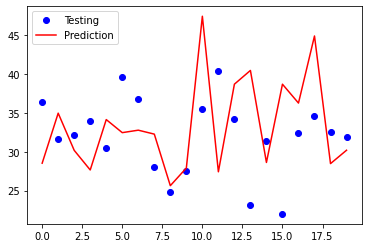

In [ ]:
prediction = model.predict(test_feature)
index = range(len(prediction))
plt.figure()
plt.plot(index, test_target, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Testing", "Prediction"])
plt.show()

In [ ]:
mae = mean_absolute_error(prediction, test_target)
print('MAE = ', mae)

MAE =  6.3176400656777325


## 6. Evaluasi (5 poin) 

## 7. Kesimpulan (5 poin)


##8. Rekomendasi (5 poin)